In [418]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
from brian2.units import *
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [419]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 16})
mlib.rcParams.update({'errorbar.capsize': 2})

In [420]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    if delta[0] > grid[0] * .5 and grid[0] > 0:
        delta[0] -= grid[0]

    if delta[1] > grid[1] * .5 and grid[1] > 0:
        delta[1] -= grid[1]

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))


def generate_gaussian_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2.):
    ''' 
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            _d = distance(s, (x, y), grid)
            _rates[x, y] = f_base + (f_peak * (np.exp(
                (-_d**2 ) / (sigma_stim ** 2* 2))))
    return _rates

def generate_multimodal_gaussian_rates(s, grid, f_base=5, f_peak=152.8, sigma_stim=2):
    '''
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.zeros(grid)
    for pos in s:
        for x in range(grid[0]):
            for y in range(grid[1]):
                _d = distance(pos, (x, y), grid)
                _rates[x, y] += (f_peak * (np.exp(
                    (-_d ** 2) / (sigma_stim ** 2 * 2))))

    for x in range(grid[0]):
        for y in range(grid[1]):
            _rates[x, y] += f_base
    return _rates

In [455]:
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/1d_case1_rewiring_unimodal_smax_64.npz")
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/1d_case1_rewiring_BROKEN_LAST_SPIKE.npz")
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/1d_case1_rewiring_rerun.npz")
data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/1d_case1_rewiring_rerun_off_by_one.npz")

In [456]:
data

In [457]:
simtime = int(data['simtime'])

In [458]:
pre_spikes = data['pre_spikes']
post_spikes = data['post_spikes']

TODO 

Analyse whether most spikes happen around the area of the input (0, 10) and less in the centre

Run experiment with 256 poisson spikes (more in centre, less on the edge

Plot weight changes over time (256x256 matrix)

Reduce fps when saving files

In [459]:
def plot_spikes(spikes, title):
    if spikes is not None:
        f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
        ax1.set_xlim((0, simtime))
        ax1.scatter([i[1] for i in spikes], [i[0] for i in spikes],s=1, marker="*")
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('spikes')
        ax1.set_title(title)
        plt.savefig(title + ".png")

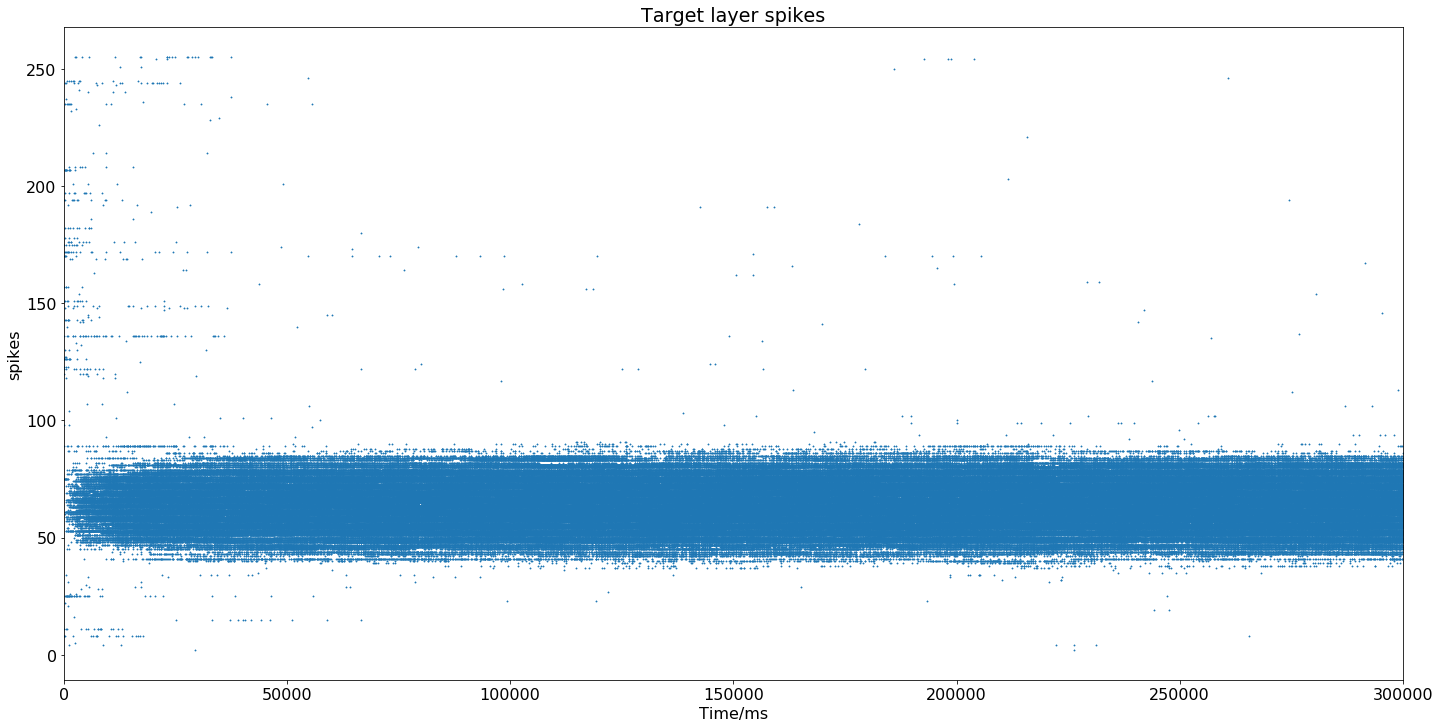

In [460]:
plot_spikes(post_spikes, "Target layer spikes")

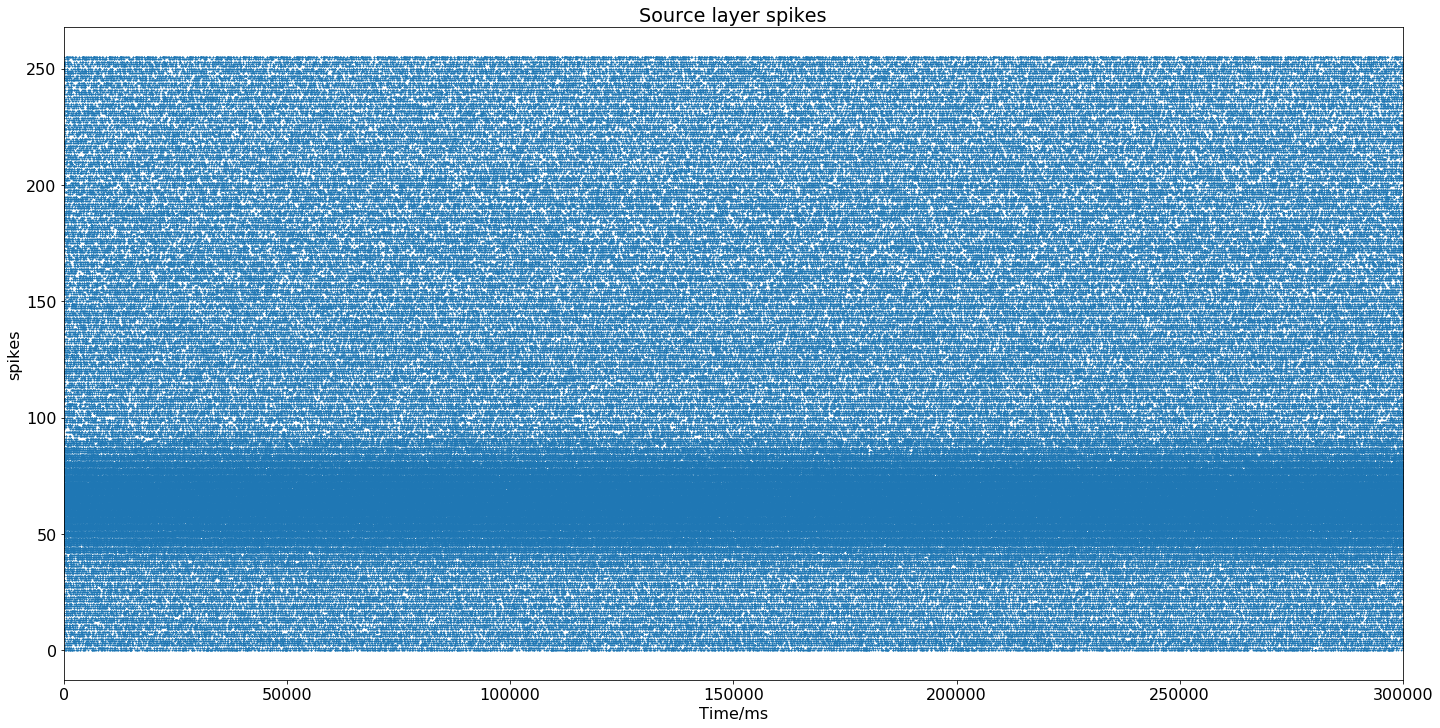

In [461]:
plot_spikes(pre_spikes, "Source layer spikes")

In [462]:
cutoff_time = 3000
filtered_spike_raster = pre_spikes[pre_spikes[:,1]<cutoff_time]
    

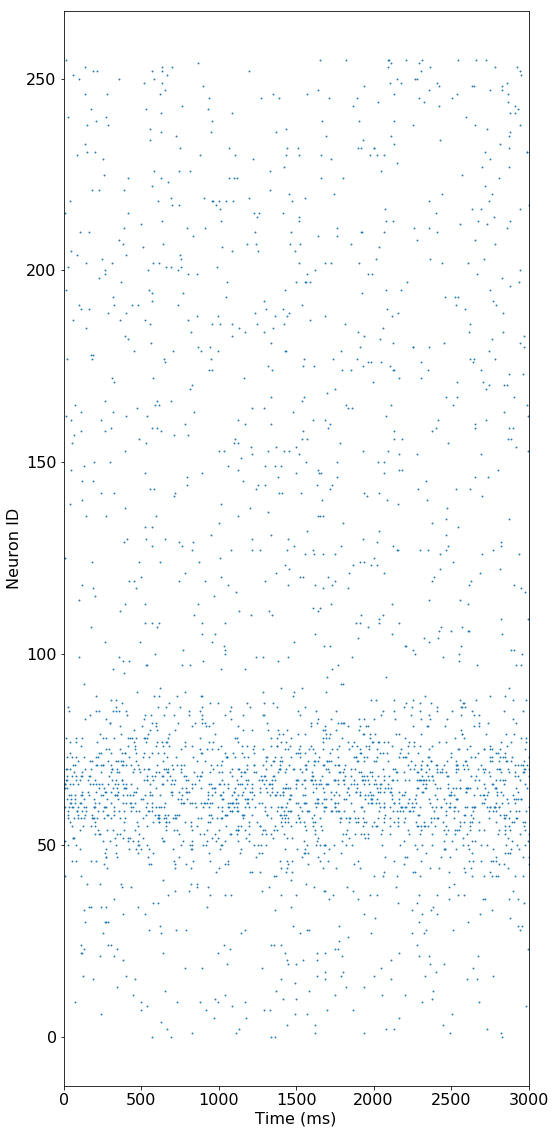

In [463]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 16))
ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,1]*3000*ms, filtered_spike_raster[:,0],s=3, marker=".")
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Neuron ID')
# ax1.set_title("Input spike raster")


plt.tight_layout()
plt.savefig("shorter_input_spike_raster.png")


In [464]:
count_source_spikes = np.zeros(256)
for id, time in pre_spikes:
    count_source_spikes[int(id)] += 1
    
count_target_spikes = np.zeros(256)
for id, time in post_spikes:
    count_target_spikes[int(id)] += 1    

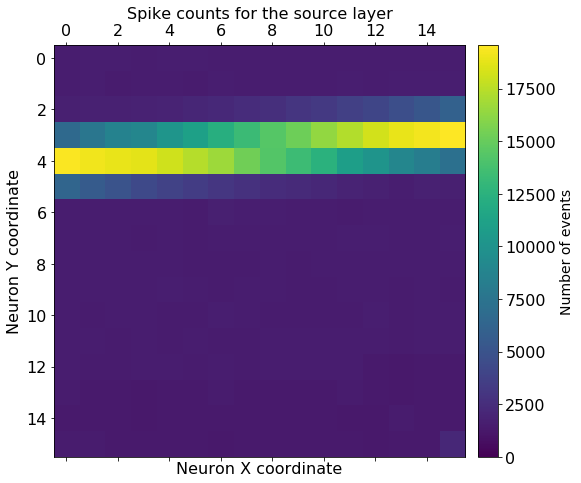

In [465]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_source_spikes.reshape(16,16), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Spike counts for the source layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
# cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# cbar = f.colorbar(i, cax=cbar_ax)
# cbar.set_label("Events", fontsize=16)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Number of events", fontsize=14)
plt.tight_layout(.3)
f.savefig('spike_count_source_layer.png')

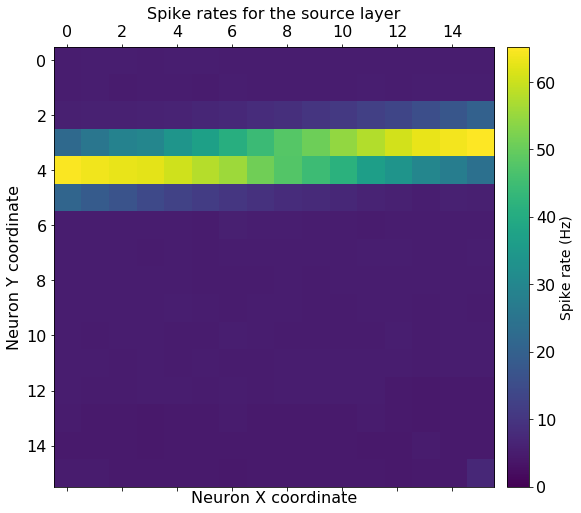

In [466]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_source_spikes.reshape(16,16)/300, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Spike rates for the source layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)
f.savefig('spike_rate_source_layer.png')

65.0


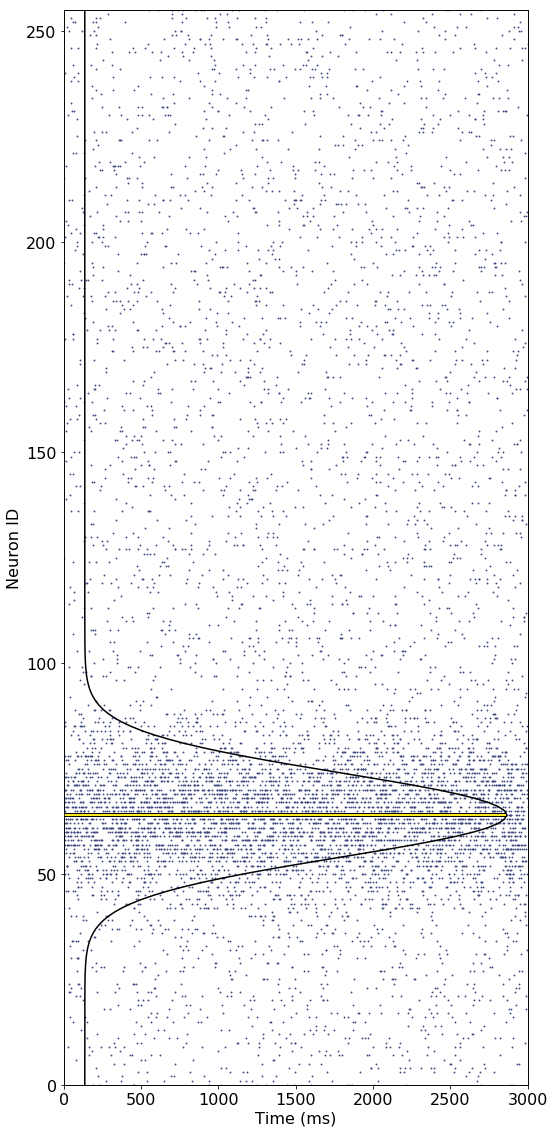

In [486]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 16), dpi=800)


ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,1], filtered_spike_raster[:,0],s=3, marker=".", c='#414C82')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Neuron ID')

ax1.set_ylim([0,255])

ax2 = ax1.twiny()

rates = generate_gaussian_rates([1, 256//4], (1, 256), sigma_stim=10, f_peak=60)
ax2.plot(rates.ravel(), np.arange(rates.size), 'k')
print np.max(rates)
vir = plt.get_cmap('viridis', 6)

ax2.axhline(64, 0, .95, c='k',linewidth=4)
ax2.axhline(64, 0, .95, c=vir(6),linewidth=2)
# ax2.plot(count_source_spikes/300., np.arange(count_spikes.size), 'k')
# ax2.plot(count_target_spikes/300., np.arange(count_spikes.size), 'r')
# ax2.set_xlim([0, np.max(count_spikes/300.)])
# ax2.set_ylabel('sin', color='r')
# ax2.tick_params('y', colors='r')
ax2.set_xticklabels([])
ax2.set_xticks([])


ax2.set_ylim([0,255])
# ax2.set_xlabel('Firing rate (Hz)')

# ax2.set_title("Input spike raster\n\n")
plt.tight_layout()

plt.savefig("shorter_input_spike_raster_with_rates.png")

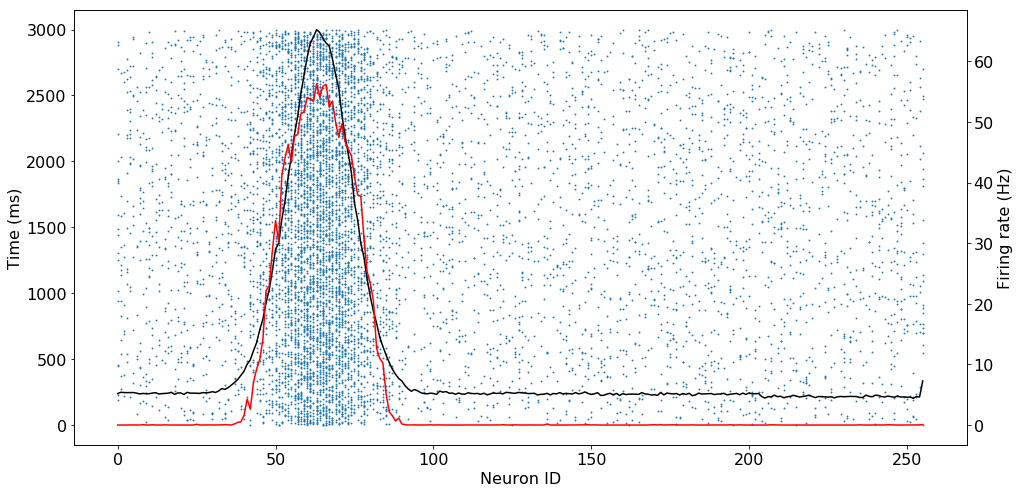

In [468]:
f, ax1 = plt.subplots(1, 1, figsize=(16, 8))
ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,0], filtered_spike_raster[:,1],s=3, marker=".")
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Neuron ID')


ax2 = ax1.twinx()
ax2.plot(count_source_spikes/300., c='k')
ax2.plot(count_target_spikes/300.,  c='r')
# ax2.set_xlim([0, np.max(count_spikes/300.)])
# ax2.set_ylabel('sin', color='r')
# ax2.tick_params('y', colors='r')
ax2.set_ylabel('Firing rate (Hz)')

# ax2.set_title("Input spike raster\n\n")

plt.savefig("shorter_input_spike_raster_with_rates_landscape.png")

In [469]:
mean_rates = count_source_spikes / float(simtime) * 1000.

In [470]:
np.mean(mean_rates)

10.925546874999998

In [471]:
len(post_spikes)

479970

In [472]:
mean_rates = np.zeros(256)


In [473]:
post_spikes.shape

(479970L, 2L)

In [474]:
count_target_spikes.shape

(256L,)

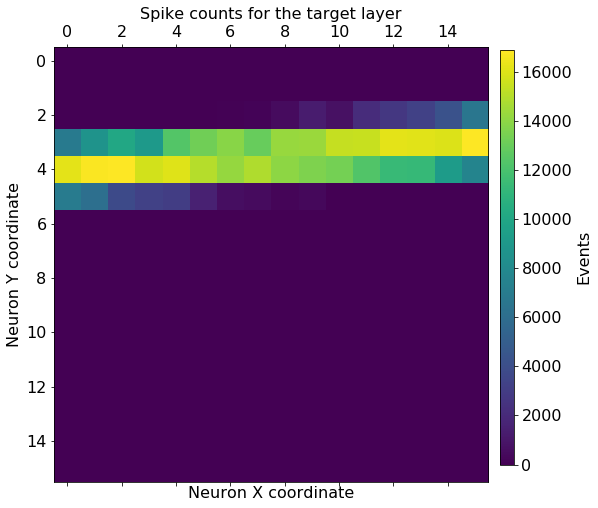

In [475]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_target_spikes.reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Spike counts for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

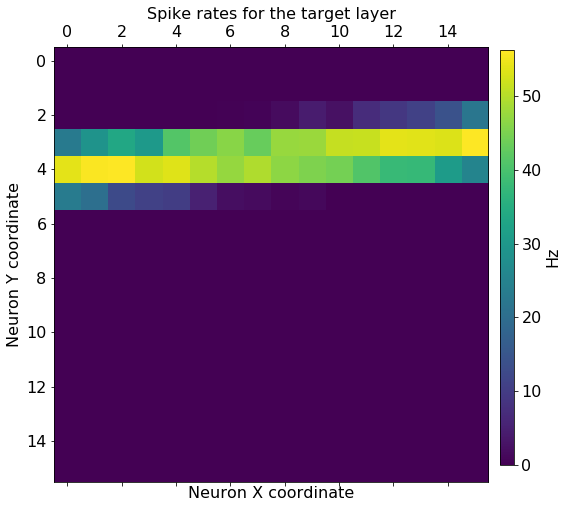

In [476]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_target_spikes.reshape(16,16)/300)
ax1.grid(visible=False)
ax1.set_title("Spike rates for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Hz", fontsize=16)

In [477]:
mean_rates = count_target_spikes / float(simtime) * 1000.

In [478]:
np.average(mean_rates)

6.2496093749999995

In [479]:
ff_last = data['final_pre_weights']
simdata = np.array(data['sim_params']).ravel()[0]
s_max = simdata['s_max']

init_ff_weights = data['init_ff_connections']

In [480]:
final_ff_weight_network = np.ones((256, 256)) * np.nan
final_ff_conn_network = np.ones((256, 256)) * np.nan

for source, target, weight, delay in ff_last:
    if np.isnan(final_ff_weight_network[int(source), int(target)]):
        final_ff_weight_network[int(source), int(target)] = weight
    else:
        final_ff_weight_network[int(source), int(target)] += weight
    if np.isnan(final_ff_conn_network[int(source), int(target)]):
        final_ff_conn_network[int(source), int(target)] = 1
    else:
        final_ff_conn_network[int(source), int(target)] += 1
        
init_ff_weight_network = np.ones((256, 256)) * np.nan
init_ff_conn_network = np.ones((256, 256)) * np.nan

for source, target, weight, delay in init_ff_weights:
    if np.isnan(init_ff_weight_network[int(source), int(target)]):
        init_ff_weight_network[int(source), int(target)] = weight
    else:
        init_ff_weight_network[int(source), int(target)] += weight
    if np.isnan(init_ff_conn_network[int(source), int(target)]):
        init_ff_conn_network[int(source), int(target)] = 1
    else:
        init_ff_conn_network[int(source), int(target)] += 1

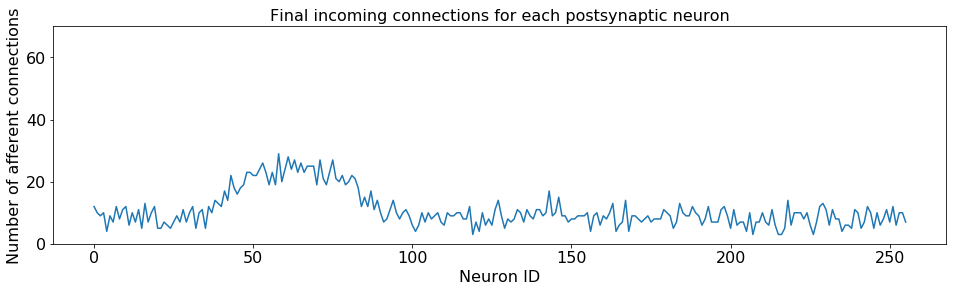

In [481]:
# Plot final synaptic capacity usage per postsynaptic neuron

final_ff_capacities = np.nansum(final_ff_conn_network, axis=0)

f, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
i = ax1.plot(final_ff_capacities, label='Feedforward connectivity')
ax1.grid(visible=False)
ax1.set_title("Final incoming connections for each postsynaptic neuron",
              fontsize=16)

# ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r',label='$S_{max}$')
# ax1.legend(loc='best')
# ax1.set_ylim([0, s_max])
ax1.set_ylim([0, 70])
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
plt.show()

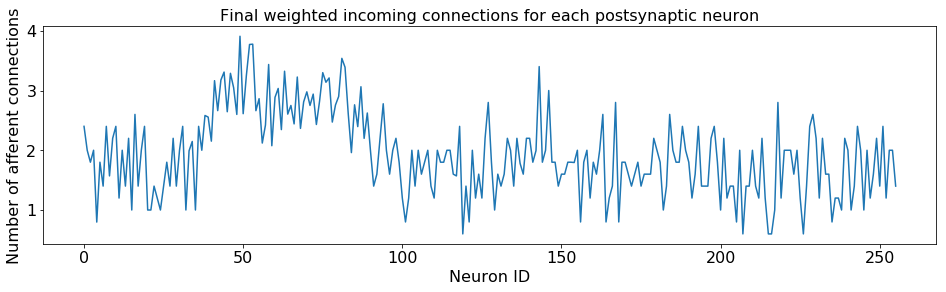

In [482]:
# Plot final synaptic capacity usage per postsynaptic neuron

final_weigted_ff_capacities = np.nansum(final_ff_weight_network, axis=0)

f, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
i = ax1.plot(final_weigted_ff_capacities, label='Feedforward connectivity')
ax1.grid(visible=False)
ax1.set_title("Final weighted incoming connections for each postsynaptic neuron",
              fontsize=16)

# ax1.axhline(y=s_max*2, xmin=0, xmax=ff_last.shape[1], c='r',
#             label='$S_{max}$')
# ax1.legend(loc='best')
# ax1.set_ylim([0, s_max])
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
plt.show()

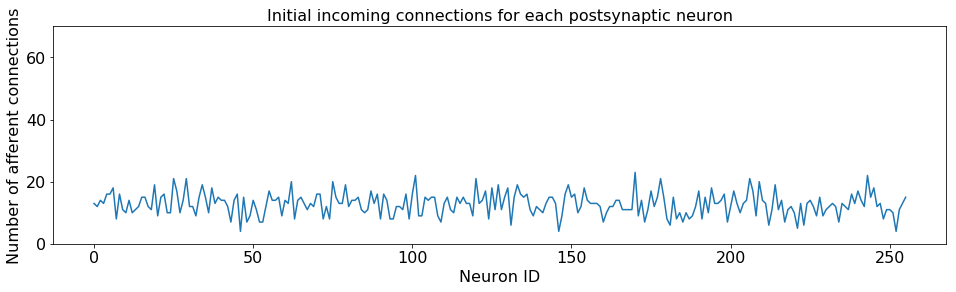

In [483]:
# Plot final synaptic capacity usage per postsynaptic neuron

init_ff_capacities = np.nansum(init_ff_conn_network, axis=0)

f, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
i = ax1.plot(init_ff_capacities, label='Feedforward connectivity')
ax1.grid(visible=False)
ax1.set_title("Initial incoming connections for each postsynaptic neuron",
              fontsize=16)

# ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r',label='$S_{max}$')
# ax1.legend(loc='best')
# ax1.set_ylim([0, s_max])
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
ax1.set_ylim([0, 70])
plt.show()

In [484]:


pre_weights= data['ff_connections']

post_weights= data['lat_connections']

In [485]:
print pre_weights.shape
print pre_weights.size
print 
print post_weights.shape
print post_weights.size

# print np.max(post_weights)

(100L,)
100

()
1


In [452]:
init_ff_connections = data['init_ff_connections']
init_lat_connections = data['init_lat_connections']

In [453]:
init_ff_connections.shape

(3310L, 4L)

In [454]:
init_conn_post_to_pre, init_weight_post_to_pre  = list_to_post_pre(init_ff_connections, init_lat_connections, 32, 256)

NameError: name 'list_to_post_pre' is not defined

In [165]:
ff_last = data['final_pre_weights']
lat_last = data['final_post_weights']

In [110]:
last_conn_post_to_pre, last_weight_post_to_pre = list_to_post_pre(ff_last, lat_last, 32, 256)

IndexError: too many indices for array

In [38]:
last_weight_post_to_pre

array([[ 0.19921875,  0.19238281,  0.19921875, ...,  0.19970703,
         0.19921875,  0.20019531],
       [ 0.19238281,  0.19824219,  0.18457031, ...,  0.19970703,
         0.19189453,  0.19921875],
       [ 0.19628906,  0.19824219,  0.20019531, ...,  0.19628906,
         0.1875    ,  0.18408203],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [239]:
simdata = np.array(data['sim_params']).ravel()[0]

In [240]:
simdata

{'case': 1,
 'cell_params': {'cm': 20.0,
  'e_rev_E': 0.0,
  'e_rev_I': -80.0,
  'i_offset': 0.0,
  'tau_m': 20.0,
  'tau_refrac': 5.0,
  'tau_syn_E': 5.0,
  'tau_syn_I': 5.0,
  'v_reset': -70.0,
  'v_rest': -70.0,
  'v_thresh': -50.0},
 'f_base': 5,
 'f_peak': 152.8,
 'f_rew': 1000,
 'g_max': 0.2,
 'grid': array([  1, 256]),
 'lateral_inhibition': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.024909268888678494,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 's_max': 16,
 'sigma_form_forward': 25,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_record': 30000,
 't_stim': 20}

ValueError: need more than 0 values to unpack

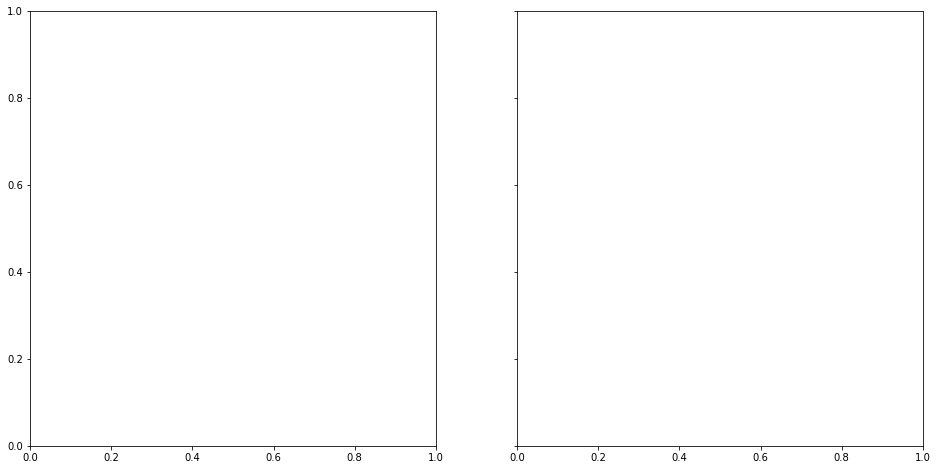

In [241]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(init_ff_connections, vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(init_lat_connections, vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [23]:
def init_conn():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (ff_conn_ax, lat_conn_ax)

def animate_conn(i):
    global ff_conn_image, lat_conn_image
    if i == 0:
        ff_conn_ax.set_data(init_ff_connections)
        lat_conn_ax.set_data(init_lat_connections)
    else:
        ff_conn_ax.set_data(pre_weights[i].reshape(256,256))
        lat_conn_ax.set_data(post_weights[i].reshape(256,256))
    return (ff_conn_ax, lat_conn_ax)

In [23]:
anim_conn = animation.FuncAnimation(fig_conn, animate_conn, init_func=init_conn,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=100, blit=True)

In [24]:
HTML(anim_conn.to_html5_video())

In [24]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_conn.save('x10_full_case_3_conn_evo.mp4', writer=writer)

In [27]:
simdata['simtime']

60000

In [28]:
simdata['t_record']

30000

In [29]:
pre_weights.shape

(2L, 256L, 256L)

In [30]:
np.count_nonzero(np.nan_to_num(pre_weights[1, :, :]) -np.nan_to_num(pre_weights[0, :, :]))

4021

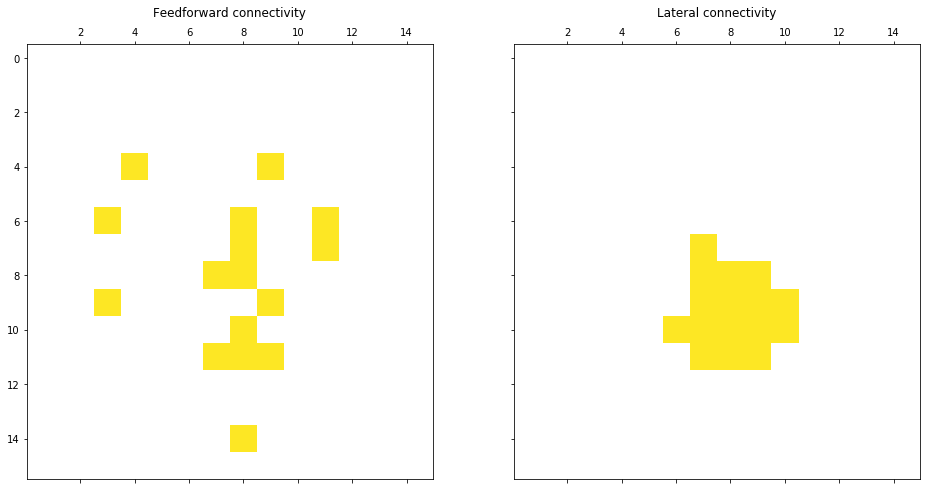

In [26]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[:, 8*19].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[:, 8*19].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [32]:
np.count_nonzero(np.isfinite(init_ff_connections[:, 8*19].reshape(16,16)))

16

In [33]:
np.count_nonzero(np.isfinite(init_lat_connections[:, 8*19].reshape(16,16)))

16

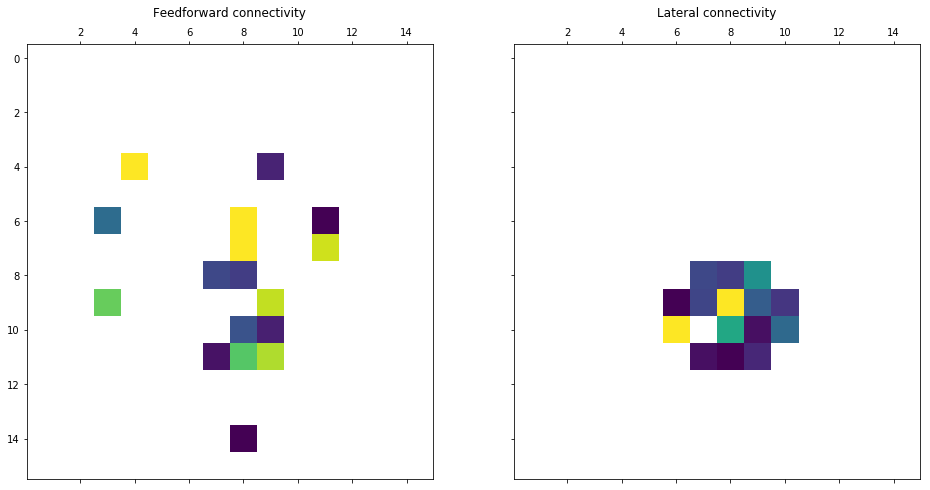

In [27]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[:, 8*19].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[:, 8*19].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [102]:
np.sum(np.isfinite(post_weights[-1].reshape(256, 256)[1, :]))

21

In [34]:
np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape

(61397L, 2L)

In [35]:
np.argwhere(np.isnan(post_weights[0].reshape(256,256))).shape

(61440L, 2L)

In [36]:
np.argwhere(np.isnan(init_lat_connections.reshape(256,256))).shape

(61440L, 2L)

In [37]:
for entry in np.argwhere(np.isnan(init_lat_connections.reshape(256,256))):
    if post_weights[-1].reshape(256,256)[entry[0], entry[1]] is np.nan:
        print entry

In [38]:
num_syn_during_runtime = []
for i in range(len(post_weights)):
    num_syn_during_runtime.append(np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape[0])

ValueError: cannot reshape array of size 7840 into shape (256,256)

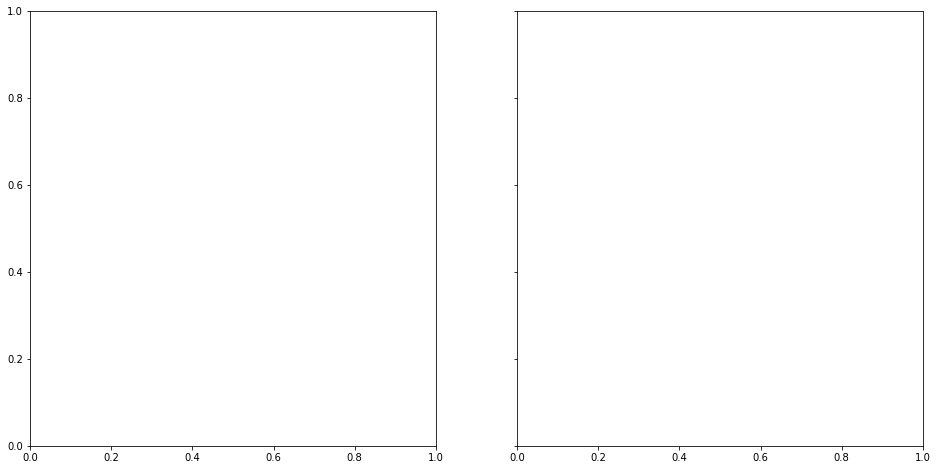

In [24]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

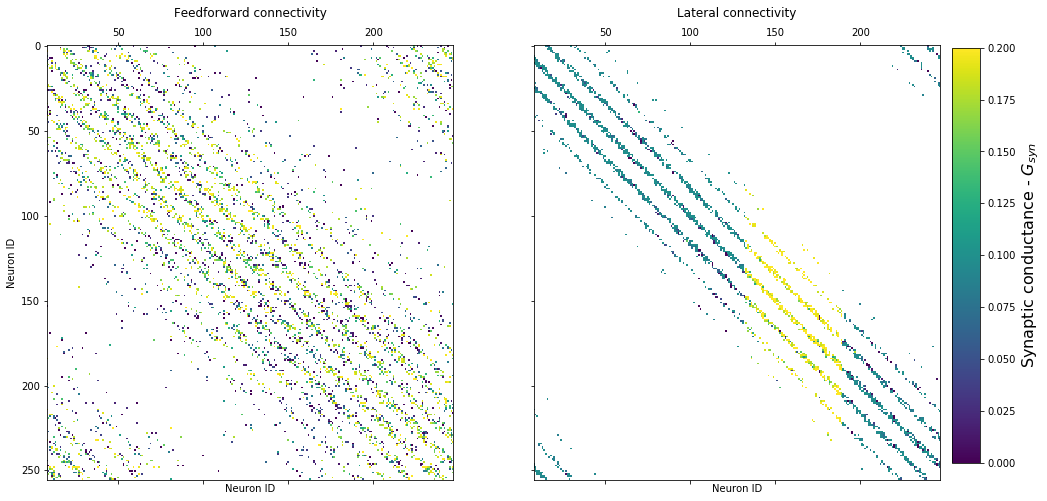

In [41]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(pre_weights[-1].reshape(256,256), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(post_weights[-1].reshape(256,256), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [40]:
diff_lat = post_weights[-1].reshape(256,256) - init_lat_connections.reshape(256, 256)

In [41]:
for pos in np.argwhere(np.isnan(diff_lat)):
    if np.isnan(post_weights[-1].reshape(256,256)[pos])[0]:
        print pos

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

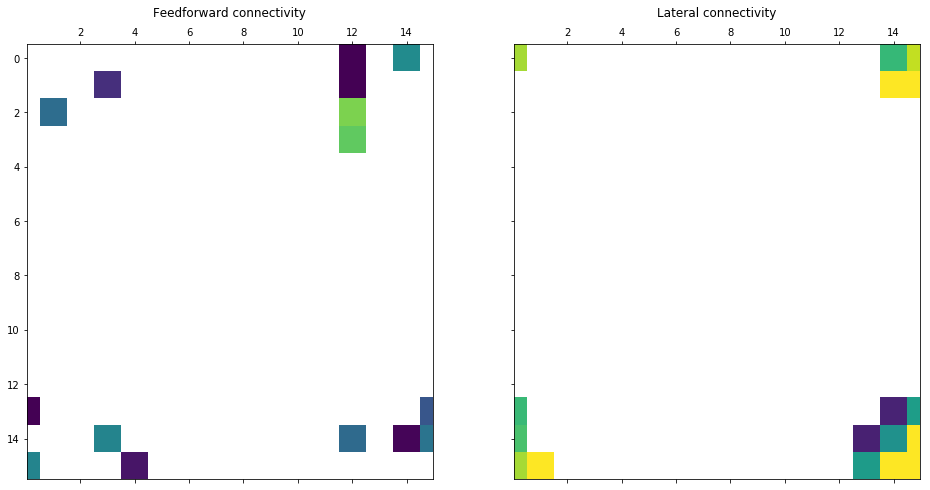

In [404]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

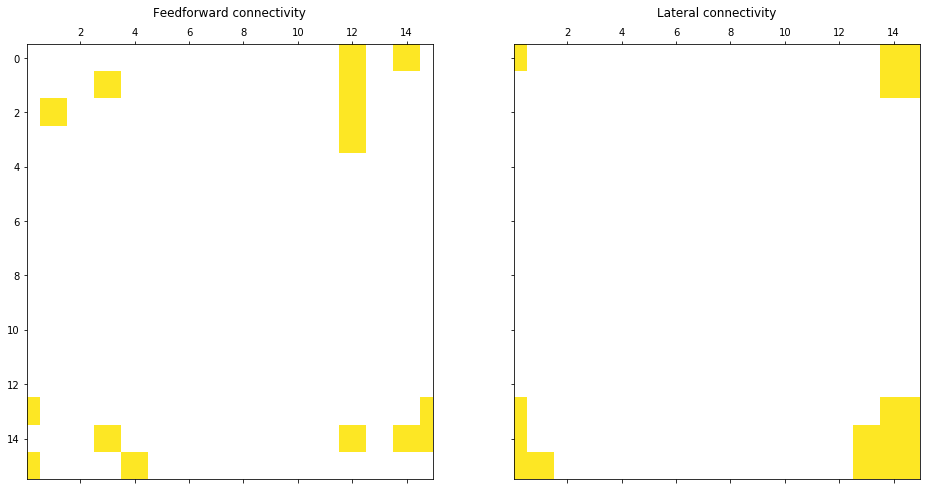

In [405]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

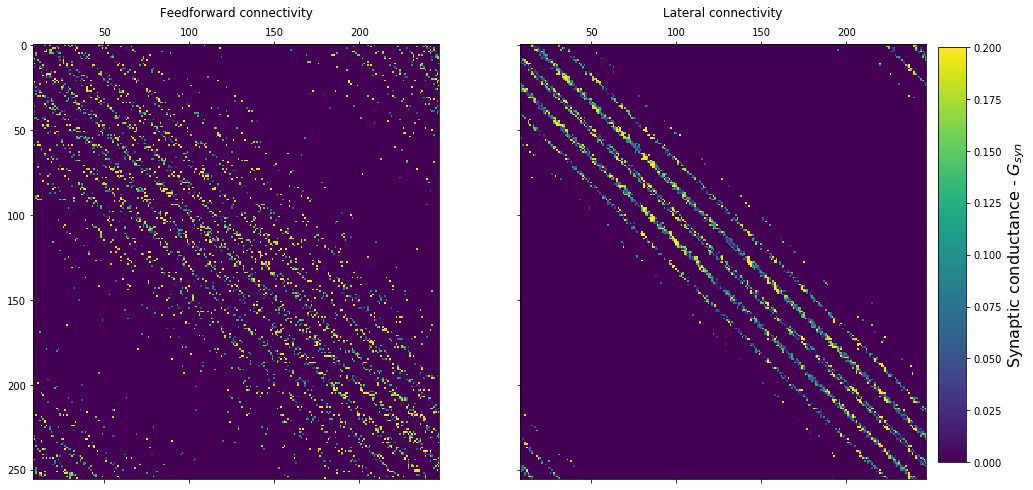

In [35]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections) - np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections) - np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [36]:
lateral_additions = np.zeros((256,256))
prev_weights = init_lat_connections
# print post_weights[0]
for i in range(post_weights.shape[0]):
    positions = np.argwhere(np.isfinite(post_weights[i].reshape(256,256)))
    for pos in positions:
        x  = pos[0]
        y  = pos[1]
        if prev_weights[x,y] is np.nan:
            lateral_additions[x,y] += 1
    
    prev_weights = post_weights[i]        
    i+=1

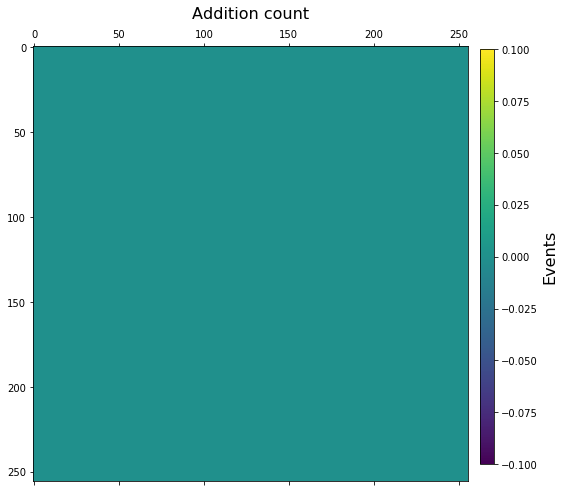

In [37]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(lateral_additions)
ax1.grid(visible=False)
ax1.set_title("Addition count", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

ValueError: cannot reshape array of size 14056 into shape (256,256)

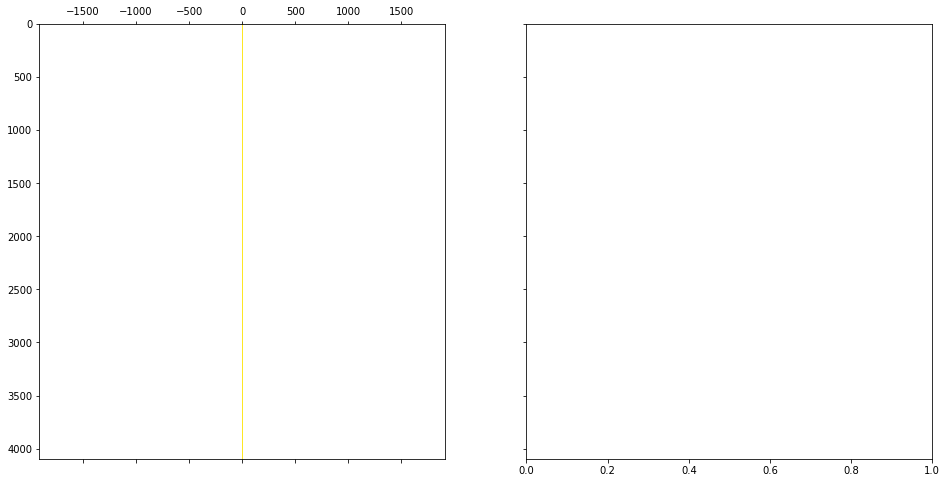

In [26]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(init_lat_connections, vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(post_weights[1].reshape(256,256), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [25]:
post_weights.shape

(100L,)

In [49]:
positions.shape

(4139L, 2L)

In [50]:
post_weights[0, 0, 0]

0.2001953125

In [51]:
print lateral_additions

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [90]:
s_max = 32

In [91]:
ff_last = pre_weights[-1].reshape(256,256)
lat_last = post_weights[-1].reshape(256,256)

ValueError: cannot reshape array of size 7840 into shape (256,256)

In [92]:
ff_count = np.count_nonzero(~np.isnan(ff_last), axis=1)
lat_count = np.count_nonzero(~np.isnan(lat_last), axis=1)

In [93]:
ff_last.shape

(1960L, 4L)

In [94]:
last_conn_post_to_pre

array([[  14.,    0.,   16., ...,   11.,   10.,   13.],
       [  17.,   16.,   18., ...,   11.,   31.,   14.],
       [  18.,   16.,   48., ...,   28.,   46.,  192.],
       ..., 
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.]])

In [95]:
last_conn_post_to_pre.shape

(64L, 256L)

In [54]:
def count_incoming_connections(post_to_pre):
    ff_count = []
    lat_count = []
    for column_index in range(post_to_pre.shape[1]):
        ff_count.append(np.count_nonzero(np.logical_and(post_to_pre[:, column_index]>=0, post_to_pre[:, column_index]<256)))
        lat_count.append(np.count_nonzero(np.logical_and(post_to_pre[:, column_index]>=256, post_to_pre[:, column_index]<512)))
    return np.asarray(ff_count), np.asarray(lat_count)

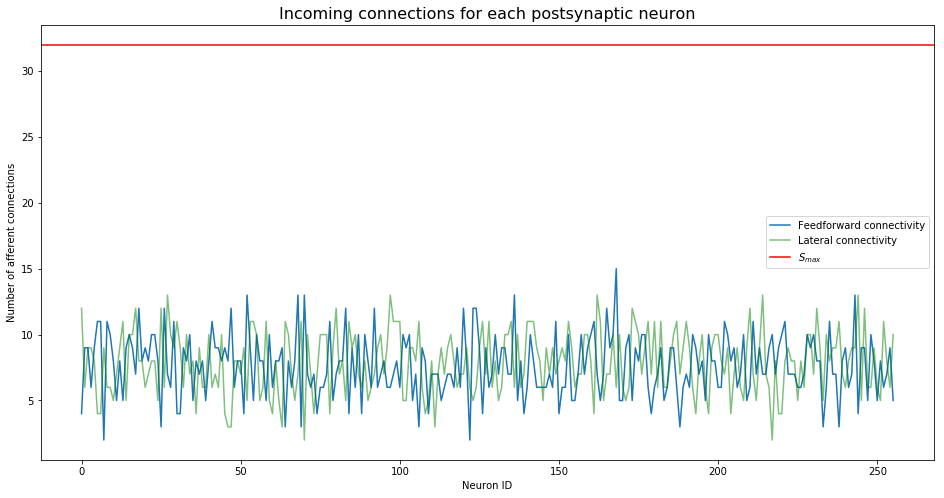

In [55]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ff_count, lat_count = count_incoming_connections(last_conn_post_to_pre)
i = ax1.plot(ff_count, label='Feedforward connectivity')
ax1.plot(lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
# cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# cbar = f.colorbar(i, cax=cbar_ax)
# cbar.set_label("Events", fontsize=16)

In [56]:
ff_count_efferent = np.count_nonzero(~np.isnan(ff_last), axis=0)
lat_count_efferent = np.count_nonzero(~np.isnan(lat_last), axis=0)

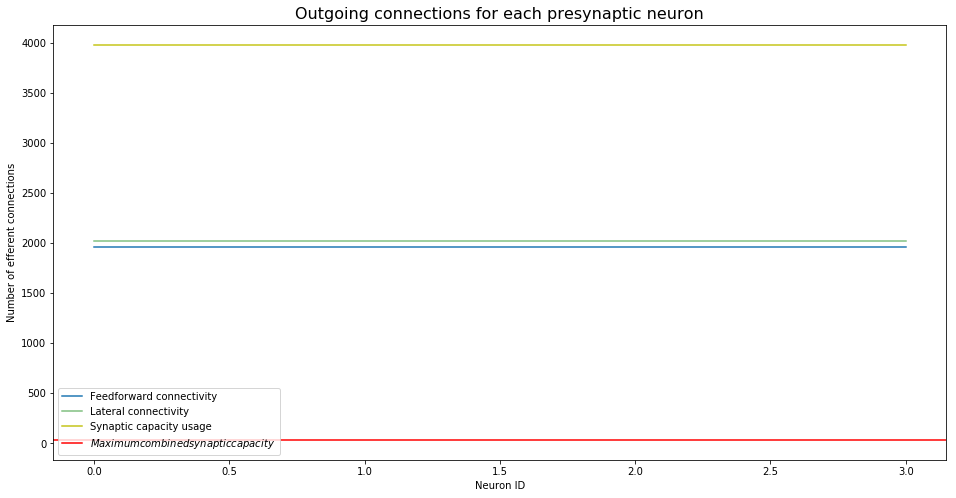

In [57]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), ff_count_efferent, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count_efferent, c='g', alpha=.5, label='Lateral connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count_efferent + ff_count_efferent, c='y', alpha=.9, label='Synaptic capacity usage')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each presynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$Maximum combined synaptic capacity$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")

In [58]:
init_ff_count, init_lat_count = count_incoming_connections(init_conn_post_to_pre)

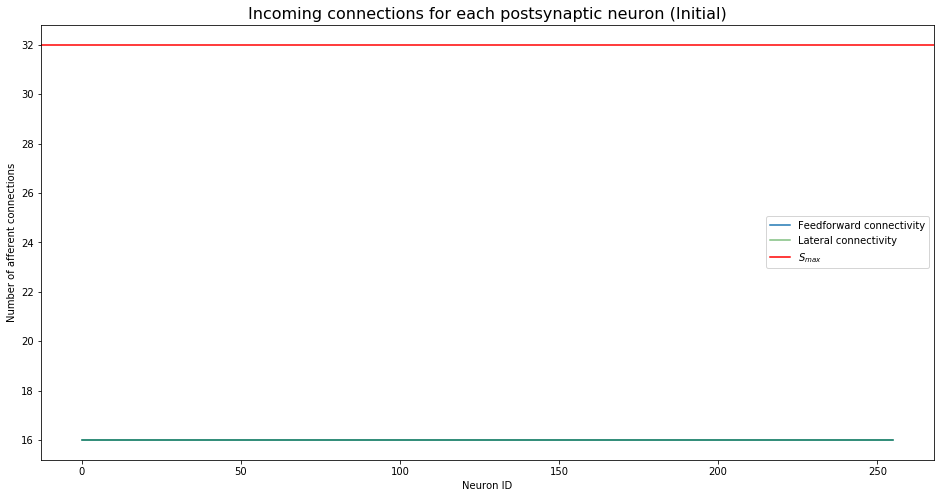

In [59]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(init_ff_count, label='Feedforward connectivity')
ax1.plot(init_lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")

In [35]:
init_ff_count_out = np.count_nonzero(~np.isnan(init_ff_connections), axis=0)
init_lat_count_out = np.count_nonzero(~np.isnan(init_lat_connections), axis=0)

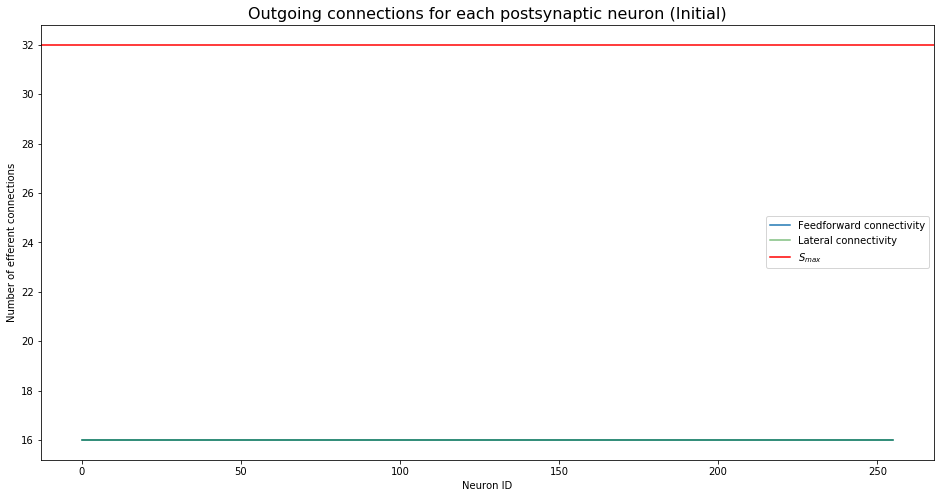

In [36]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), init_ff_count_out, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), init_lat_count_out, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")

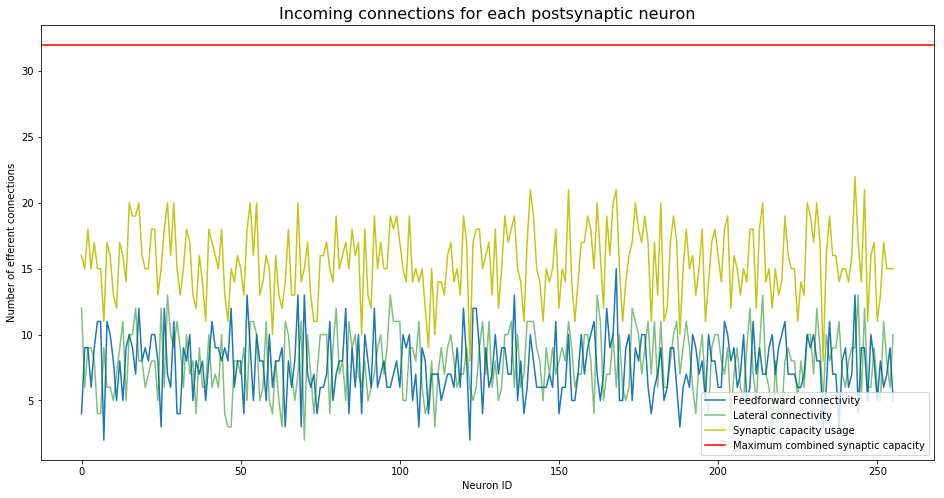

In [60]:
# synaptic capacity animation 
f_capacity, (ax1_capacity) = plt.subplots(1, 1 ,figsize=(16, 8))
capacity_1,  = ax1_capacity.plot(ff_count, label='Feedforward connectivity')
capacity_2, = ax1_capacity.plot(lat_count, c='g', alpha=.5, label='Lateral connectivity')
capacity_3, = ax1_capacity.plot(ff_count + lat_count, c='y', alpha=.9, label='Synaptic capacity usage')
ax1_capacity.grid(visible=False)
ax1_capacity.set_title("Incoming connections for each postsynaptic neuron", fontsize=16)
ax1_capacity.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='Maximum combined synaptic capacity')
ax1_capacity.legend(loc='lower right')
ax1_capacity.set_xlabel("Neuron ID")
ax1_capacity.set_ylabel("Number of efferent connections")

In [38]:
def init_capacity():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (capacity_1, capacity_2, capacity_3 )

def animate_capacity(i):
    global pre_weights, post_weights, init_conn_post_to_pre, 
    if i == 0:
        ff_count, lat_count = 
    else:
        ff_current = pre_weights[i-1].reshape(256,256)
        lat_current = post_weights[i-1].reshape(256,256)
    ff_count_efferent = np.count_nonzero(~np.isnan(ff_current), axis=0)
    lat_count_efferent = np.count_nonzero(~np.isnan(lat_current), axis=0)
#     ax1_capacity.cla()
    capacity_1.set_data(range(ff_current.shape[1]), ff_count_efferent)
    capacity_2.set_data(range(ff_current.shape[1]), lat_count_efferent)
    capacity_3.set_data(range(ff_current.shape[1]), lat_count_efferent + ff_count_efferent)
#     ax1_capacity.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$Maximum combined synaptic capacity$')
    return (capacity_1, capacity_2, capacity_3 )

In [39]:
anim_capacity = animation.FuncAnimation(f_capacity, animate_capacity, init_func=init_capacity,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=200, blit=True)

In [420]:
HTML(anim_capacity.to_html5_video())

In [40]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_capacity.save('x10_full_case_3_syn_capacity.mp4', writer=writer)

In [242]:
final_pre_weights = data['final_pre_weights']

In [243]:
grid = simdata['grid']

In [244]:
final_network = np.ones((256, 256)) * np.nan
for source, target, weight, delay in final_pre_weights:
    if np.isnan(final_network[int(source), int(target)]):
        final_network[int(source), int(target)] = 1
    else:
        final_network[int(source), int(target)] += 1
    assert delay == 1

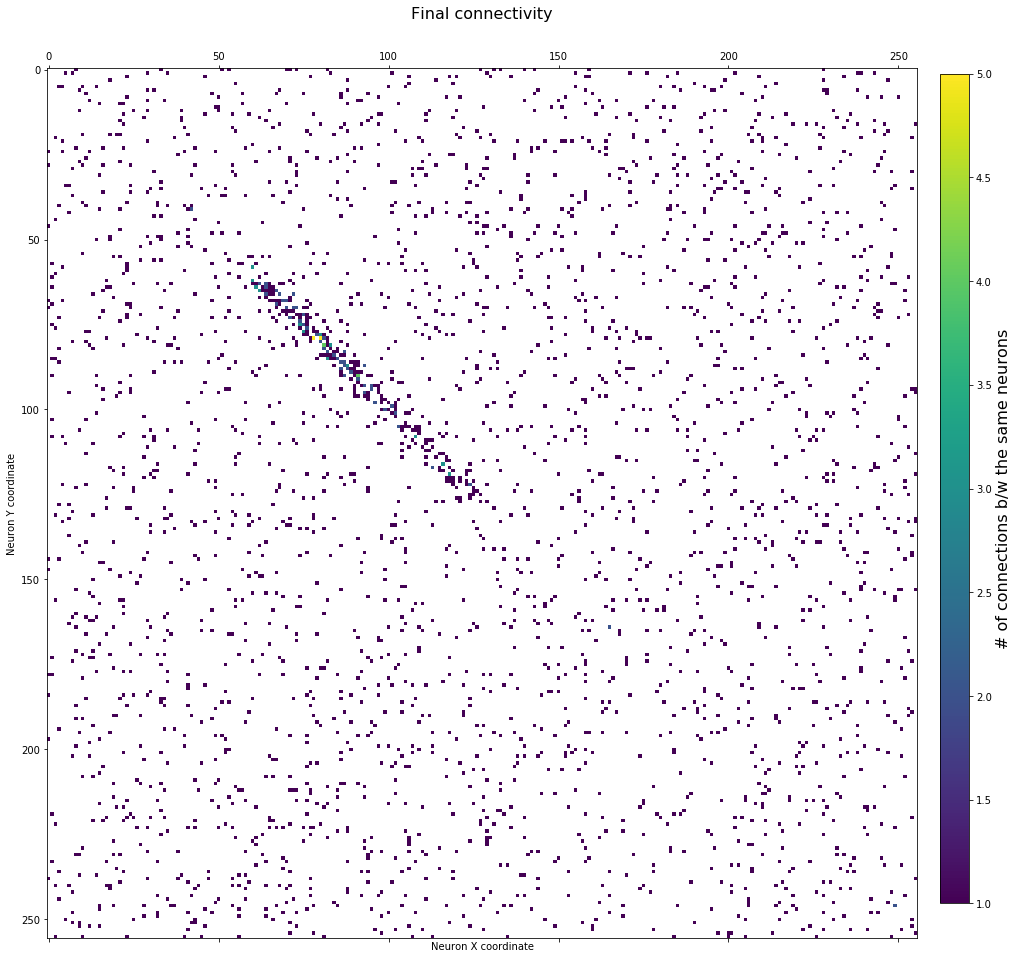

In [247]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(final_network)
ax1.grid(visible=False)
ax1.set_title("Final connectivity", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("# of connections b/w the same neurons", fontsize=16)
plt.savefig("final_conn_1d.png")